In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv(
    "/Users/apurvabhamre/Downloads/archive (7)/marketing_campaign.csv",
    sep=';',
    engine='python'
)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [14]:
df.columns.tolist()


['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [15]:
df['Total_Spend'] = (
    df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
)

df['Total_Purchases'] = (
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)

In [16]:
campaign_cols = [
    'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
    'AcceptedCmp4','AcceptedCmp5','Response'
]

campaign_effectiveness = {
    col: df[col].mean() for col in campaign_cols
}

campaign_effectiveness_df = pd.DataFrame.from_dict(
    campaign_effectiveness, orient='index', columns=['Acceptance_Rate']
)
campaign_effectiveness_df

,Acceptance_Rate
AcceptedCmp1,0.064286
AcceptedCmp2,0.013393
AcceptedCmp3,0.072768
AcceptedCmp4,0.074554
AcceptedCmp5,0.072768
Response,0.149107


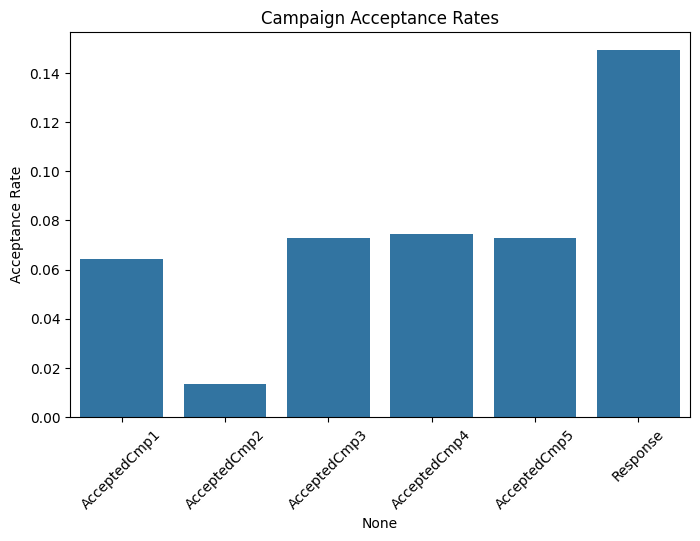

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=campaign_effectiveness_df.index,
    y=campaign_effectiveness_df['Acceptance_Rate']
)
plt.title("Campaign Acceptance Rates")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.show()

In [18]:
df['Age'] = 2024 - df['Year_Birth']

In [19]:
df.groupby('Response')['Age'].mean()

Response
0    55.301154
1    54.583832
Name: Age, dtype: float64

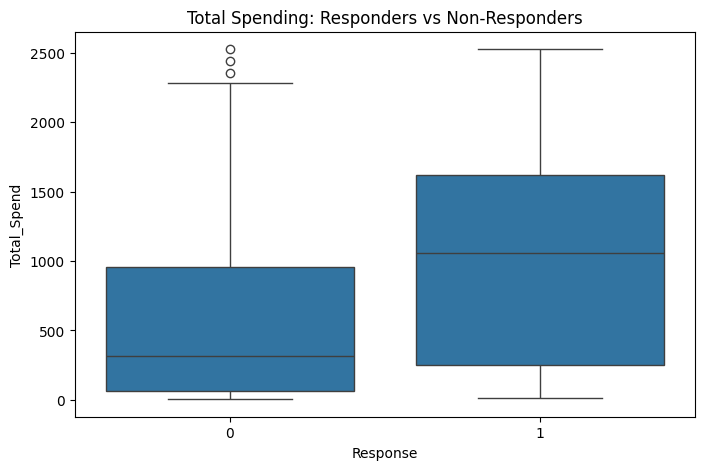

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Response', y='Total_Spend')
plt.title("Total Spending: Responders vs Non-Responders")
plt.show()


In [21]:
Q1 = df['Total_Spend'].quantile(0.25)
Q3 = df['Total_Spend'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Total_Spend'] >= lower_bound) & (df['Total_Spend'] <= upper_bound)]

In [27]:
df.shape, df_no_outliers.shape


((2240, 33), (2237, 32))

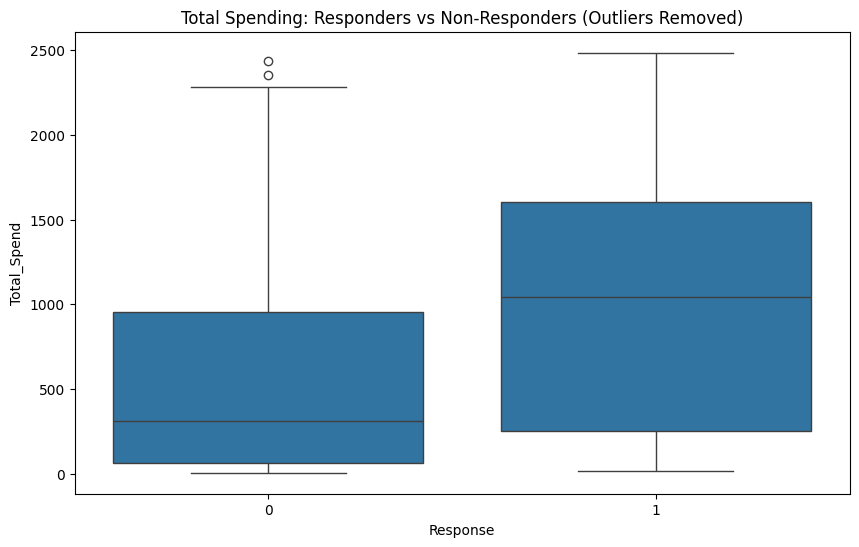

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_no_outliers, x='Response', y='Total_Spend')
plt.title("Total Spending: Responders vs Non-Responders (Outliers Removed)")
plt.show()


In [29]:
lower = df['Total_Spend'].quantile(0.01)
upper = df['Total_Spend'].quantile(0.99)

df_trimmed = df[(df['Total_Spend'] >= lower) & (df['Total_Spend'] <= upper)]


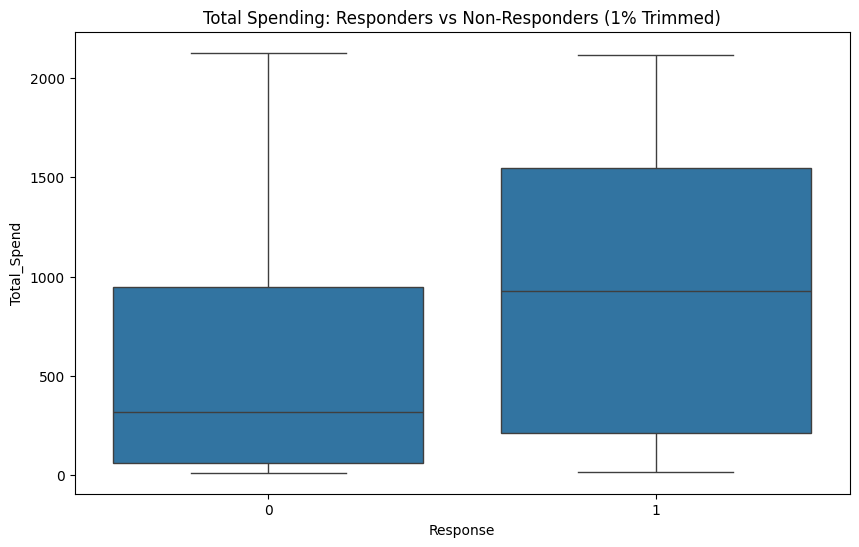

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_trimmed, x='Response', y='Total_Spend')
plt.title("Total Spending: Responders vs Non-Responders (1% Trimmed)")
plt.show()


In [31]:
responders = df[df['Response'] == 1]

In [32]:
responders[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].mean()

NumWebPurchases        5.071856
NumCatalogPurchases    4.203593
NumStorePurchases      6.095808
NumWebVisitsMonth      5.293413
dtype: float64

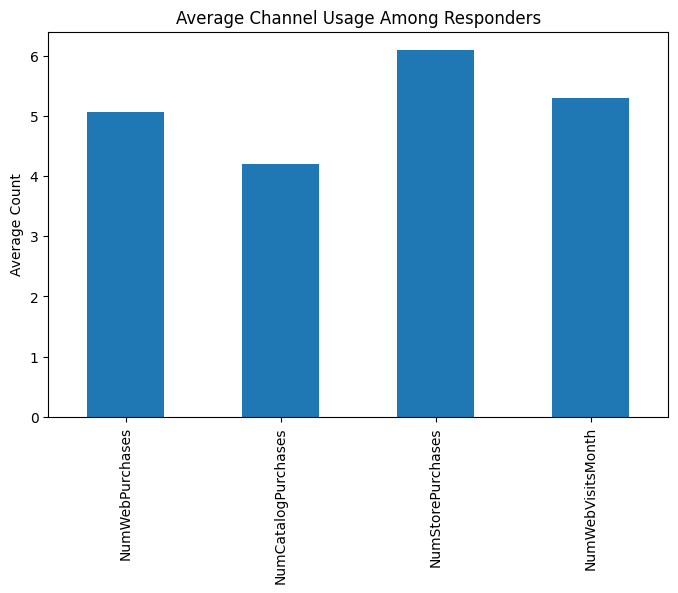

In [33]:
responders[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].mean().plot(
    kind='bar', figsize=(8,5)
)
plt.title("Average Channel Usage Among Responders")
plt.ylabel("Average Count")
plt.show()

In [34]:
rfm = df[['Recency','Total_Purchases','Total_Spend']]
rfm.head()

,Recency,Total_Purchases,Total_Spend
0,58,22,1617
1,38,4,27
2,26,20,776
3,26,6,53
4,94,14,422


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(rfm_scaled)